### Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import graphviz
from sklearn.model_selection import train_test_split ## 訓練、測試切割
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error

### Data Preprocessing

In [2]:
train_data = pd.read_csv("adult/adult.data", header= None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

#刪除重複的值
print("原始比數：",train_data.shape)
train_data.drop_duplicates(inplace=True)
train_data = train_data.sort_index(axis=0)
print("刪除重複的值後：",train_data.shape)

#刪除問號的值(取眾數)
vals, counts = np.unique(train_data['workclass'],return_counts=True)
train_data['workclass'] = train_data['workclass'].replace(" ?", vals[np.argmax(counts)])
vals, counts = np.unique(train_data['occupation'],return_counts=True)
train_data['occupation'] = train_data['occupation'].replace(" ?", vals[np.argmax(counts)])
vals, counts = np.unique(train_data['native-country'],return_counts=True)
train_data['native-country'] = train_data['native-country'].replace(" ?", vals[np.argmax(counts)])

# 刪除欄位意義重複的欄位
train_data.drop("education",axis=1,inplace=True)
train_data.drop("fnlwgt",axis=1,inplace=True)

# 每個元素的前後空格去掉
train_data = train_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# 判斷是否還有空值
train_data.isnull().sum(axis=0)

原始比數： (32561, 15)
刪除重複的值後： (32537, 15)


age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [3]:
## 類別屬性做One-hot Encoding
train_nd = pd.get_dummies(train_data, columns=['workclass','marital-status','occupation','relationship','race','sex','native-country'], dtype=int)

## 數值屬性做Normalization(z-score)
numerical_columns = ['age','education-num','capital-gain','capital-loss']
scaler = preprocessing.StandardScaler()
train_nd[numerical_columns] = scaler.fit_transform(train_nd[numerical_columns])

## 類別屬性(income)做Label Encoding
label_encoder = preprocessing.LabelEncoder()
train_nd["income"] = label_encoder.fit_transform(train_nd["income"])

## 將"&"，改為and，以便作圖
train_nd = train_nd.rename(columns={'native-country_Trinadad&Tobago': 'native-country_Trinadad_and_Tobago'})

In [4]:
test_data = pd.read_csv("adult/adult.test", header= None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
test_data.drop(0,axis=0,inplace=True)
#刪除重複的值
print("原始比數：",test_data.shape)
test_data.drop_duplicates(inplace=True)
test_data = test_data.sort_index(axis=0)
print("刪除重複的值後：",test_data.shape)

#刪除問號的值(取眾數)
vals, counts = np.unique(test_data['workclass'],return_counts=True)
test_data['workclass'] = test_data['workclass'].replace(" ?", vals[np.argmax(counts)])
vals, counts = np.unique(test_data['occupation'],return_counts=True)
test_data['occupation'] = test_data['occupation'].replace(" ?", vals[np.argmax(counts)])
vals, counts = np.unique(test_data['native-country'],return_counts=True)
test_data['native-country'] = test_data['native-country'].replace(" ?", vals[np.argmax(counts)])

# 刪除欄位意義重複的欄位
test_data.drop("education",axis=1,inplace=True)
test_data.drop("fnlwgt",axis=1,inplace=True)

# 每個元素的前後空格去掉
test_data = test_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

def strip_special_chars(value):
    if isinstance(value, str):
        return value.strip(".")
    return value

test_data = test_data.applymap(strip_special_chars)

# 判斷是否還有空值
test_data.isnull().sum(axis=0)

原始比數： (16281, 15)
刪除重複的值後： (16276, 15)


age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [5]:
## 類別屬性做One-hot Encoding
test_nd = pd.get_dummies(test_data,columns=['workclass','marital-status','occupation','relationship','race','sex','native-country'], dtype=int)
test_nd['native-country_Holand-Netherlands'] = 0

## 類別屬性(income)做Label Encoding
test_nd["income"] = label_encoder.transform(test_nd["income"])

## 數值屬性做Normalization(z-score)
numerical_columns = ['age','education-num','capital-gain','capital-loss']
test_nd[numerical_columns] = scaler.transform(test_nd[numerical_columns])

## 將"&"，改為and，以便作圖
test_nd = test_nd.rename(columns={'native-country_Trinadad&Tobago': 'native-country_Trinadad_and_Tobago'})

### KNN Regression

#### Model Construct

In [47]:
from sklearn.neighbors import KNeighborsRegressor
## 將訓練集與測試集分別切分特徵與目標欄位
train_x = train_nd.drop("hours-per-week",axis=1)
train_y = train_nd['hours-per-week']

test_x = test_nd.drop("hours-per-week",axis=1)
test_y = test_nd['hours-per-week']

clf = KNeighborsRegressor(n_neighbors=100,n_jobs=-1)
clf.fit(train_x.values,train_y)

#評估決策器效能
acc = clf.score(train_x.values, train_y)
print(f'分類器準確度: {round(acc,2)}')

分類器準確度: 0.25


In [61]:
# len(train_y.ravel())
len(test_x)

16276

In [62]:
# n_neighbors = 5

# for i, weights in enumerate(["uniform", "distance"]):
#     knn = KNeighborsRegressor(n_neighbors, weights=weights)
#     pred_y = knn.fit(train_x, train_y.values).predict(test_x)

#     plt.subplot(2, 1, i + 1)
#     plt.scatter(test_x, test_y, color="darkorange", label="data")
#     plt.plot(test_x, pred_y, color="navy", label="prediction")
#     plt.axis("tight")
#     plt.legend()
#     plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

# plt.tight_layout()
# plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


#### Evaluation

In [65]:
## 預測測試資料
predict_y = clf.predict(test_x.values)
#calculate rmse
error_rmse = np.sqrt(mean_squared_error(test_y,predict_y)) 
print('RMSE:', round(error_rmse,3))
#calculate mape
error_mape = mean_absolute_percentage_error(test_y,predict_y) 
print('MAPE:', round(error_mape,3)*100,'%')
#calculate r squared
error_r2 = r2_score(test_y,predict_y,multioutput='uniform_average') 
print('r_squared_value:', round(error_r2,3))

RMSE: 10.826
MAPE: 31.4 %
r_squared_value: 0.247


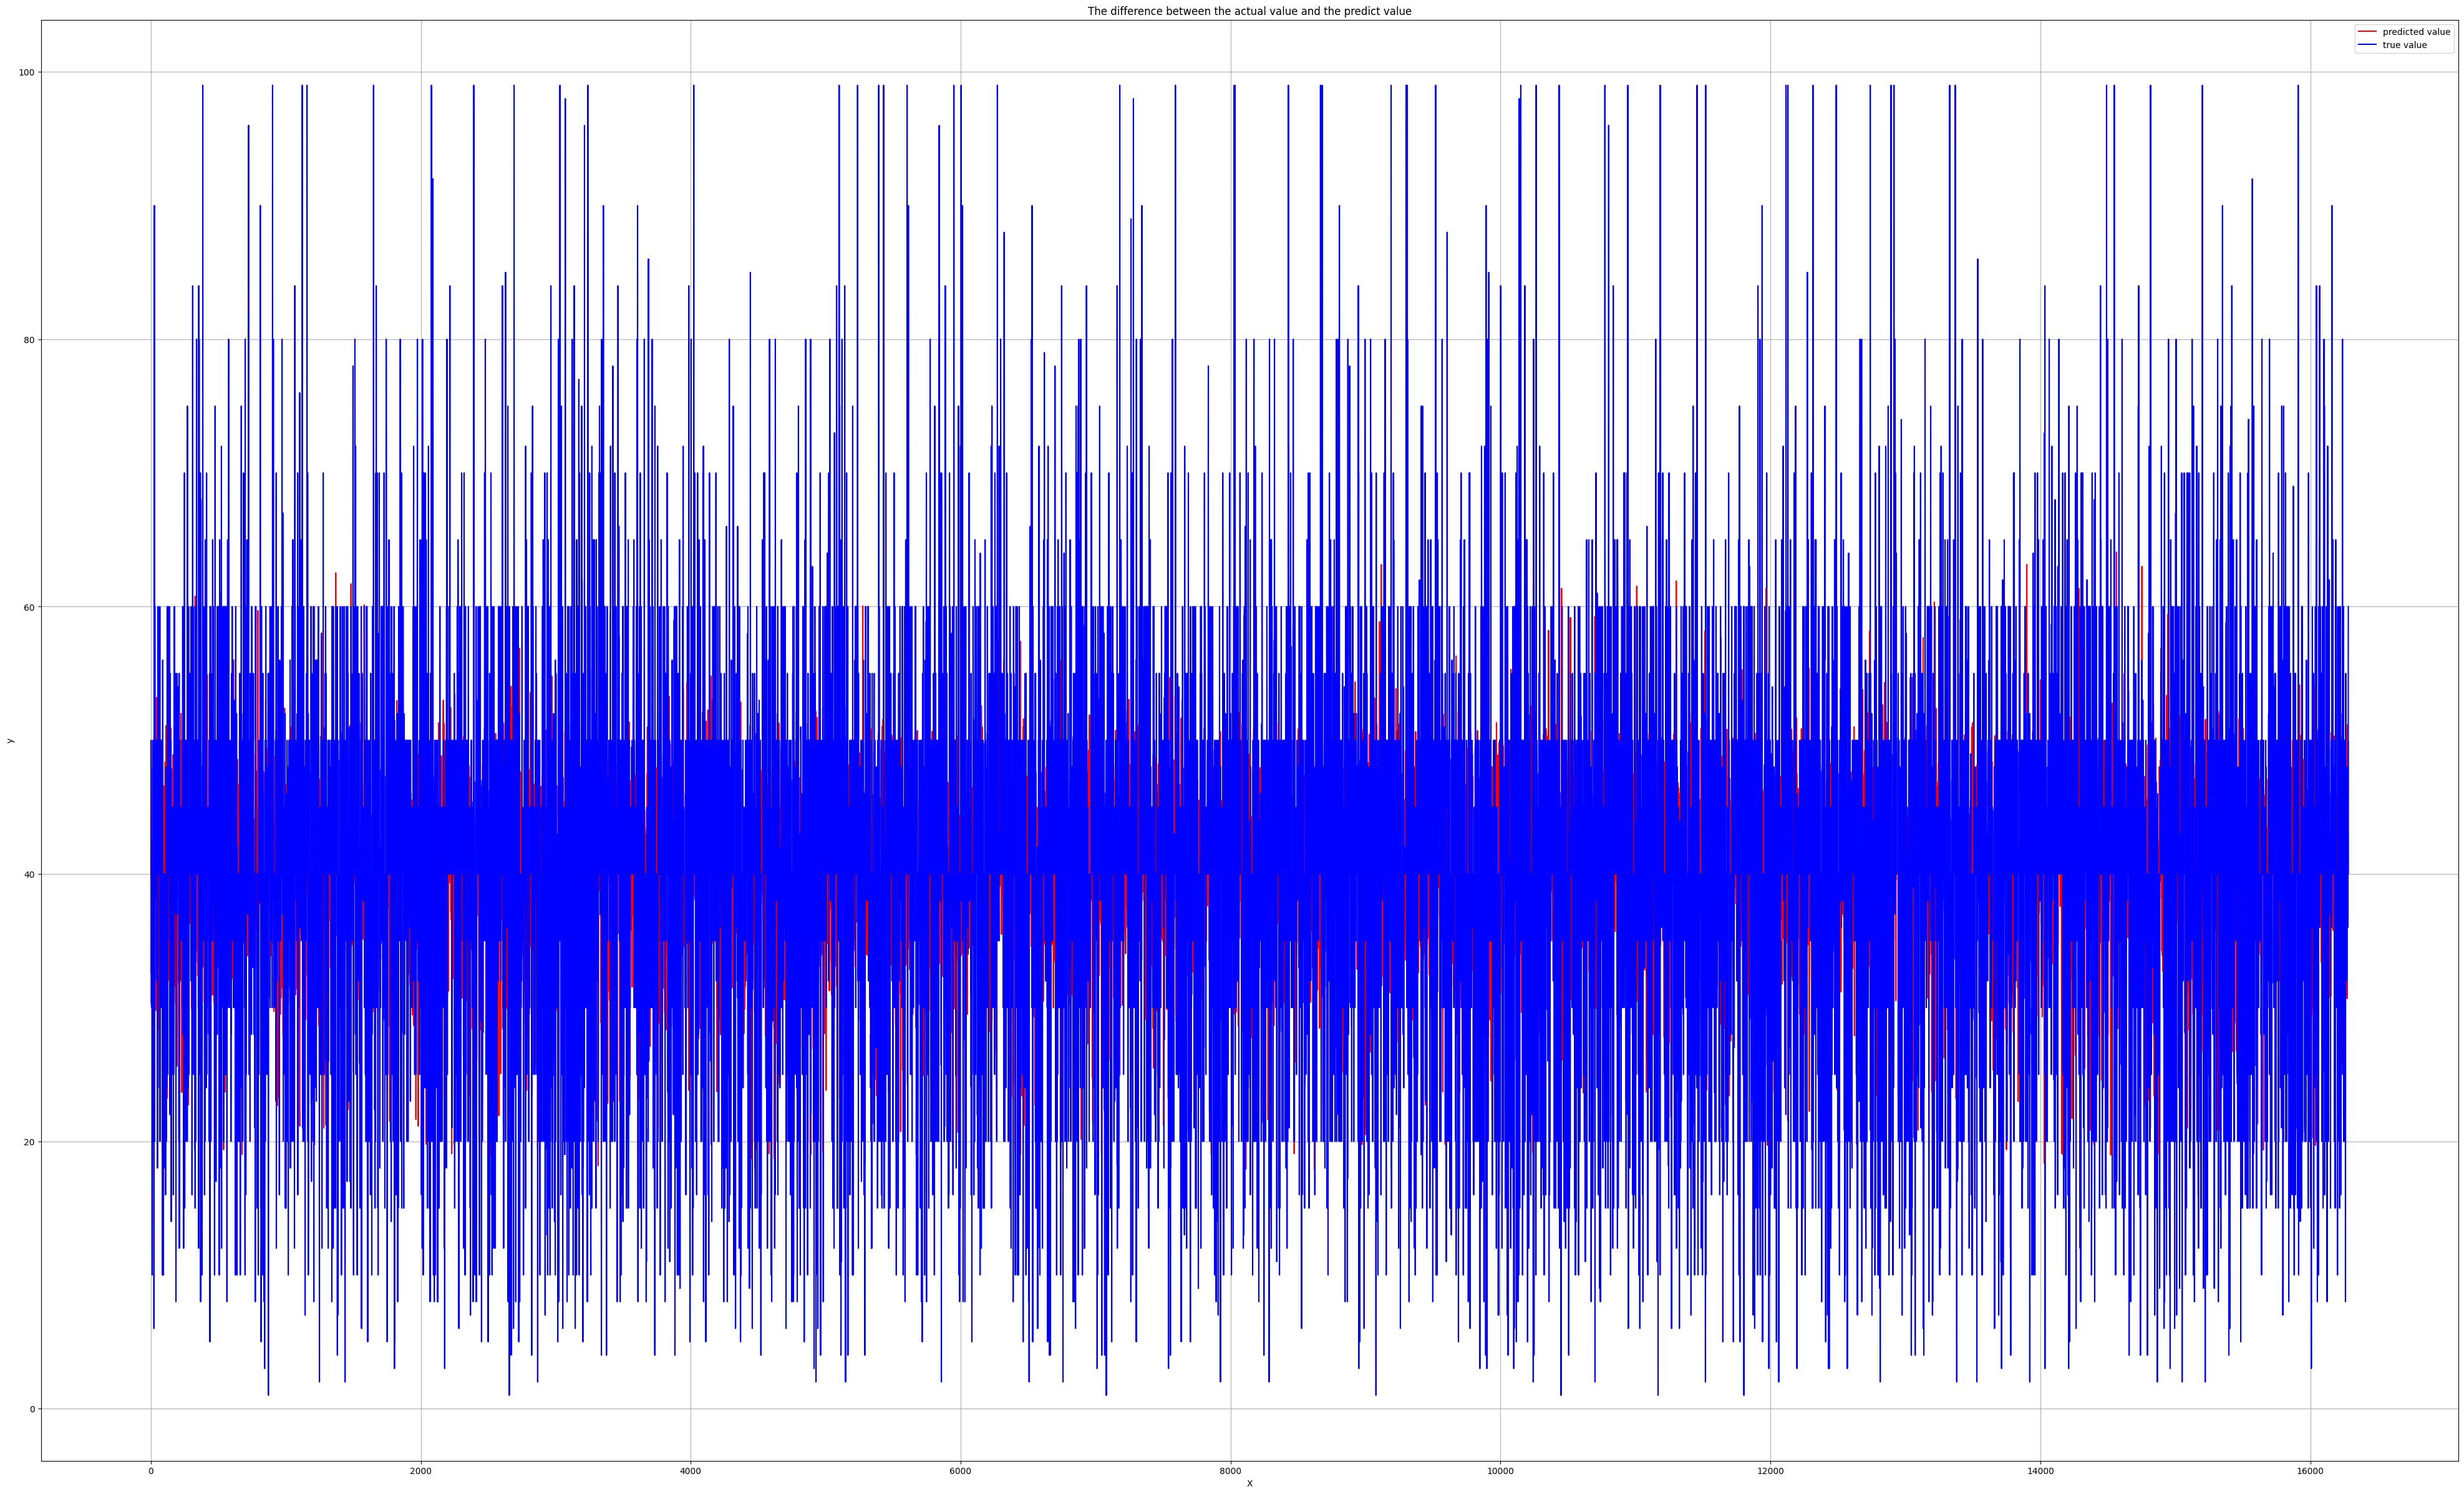

In [30]:
act_y =test_y
pre_y =predict_y
plt.figure(figsize=(50, 30))
plt.plot(pre_y, label='predicted value',color='red')
plt.plot(act_y, label='true value',color='blue')
plt.ylabel("y")
plt.xlabel("X")
plt.title("The difference between the actual value and the predict value")
# plt.xlim([0, 55])
plt.grid(True)
plt.legend()
plt.show()

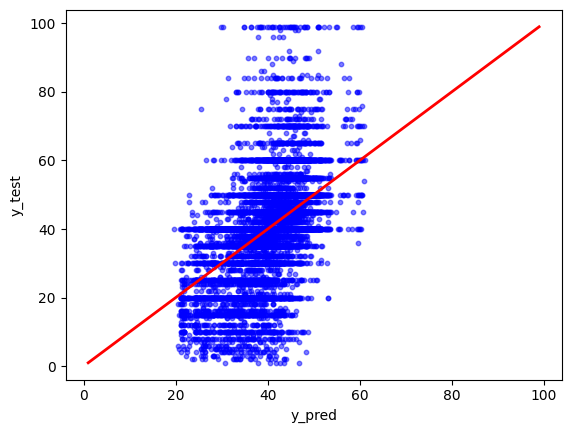

In [68]:
# plotting the y_test vs y_pred
plt.scatter(predict_y,test_y.values,c='b',s=10,alpha=0.5)
# 添加迴歸線
plt.plot([min(test_y.values), max(test_y.values)], [min(test_y.values), max(test_y.values)], linestyle='-', color='red', linewidth=2, label='Ideal line (y=x)')

plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [ ]:

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=y_pred, y=y_test)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal line (y=x)')
# plt.title(f'Predicted vs. Actual Values (R-squared: {r2:.2f})')
# plt.xlabel('Predicted Values')
# plt.ylabel('Actual Values')
# plt.legend()
# plt.show()

-------------

### SVR

#### Model Construct

In [6]:
from sklearn.svm import SVR
from math import sqrt
import time

train_x = train_nd.drop("hours-per-week",axis=1)
train_x = train_x.sort_index(axis=1)
train_y = train_nd['hours-per-week']

test_x = test_nd.drop("hours-per-week",axis=1)
test_x = test_x.sort_index(axis=1)
test_y = test_nd['hours-per-week']

start=time.time()
model = SVR(C=200,max_iter=1000000,cache_size=1000)
model=model.fit(train_x,train_y.ravel())  #fit the model
pred_y=model.predict(test_x) #make prediction on test set
end=time.time()


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


#### Evaluation

In [8]:
error_RMSE = np.sqrt(mean_squared_error(test_y,pred_y)) #calculate rmse
error_MAPE = mean_absolute_percentage_error(test_y,pred_y)
error_r2 = r2_score(pred_y,test_y) 

print('RMSE value is:', round(error_RMSE,3))
print('MAPE value is:', round((error_MAPE*100),2),'%')
print('r_squared_value:', round(error_r2,3))
print('執行時間:',end-start)

RMSE value is: 11.008
MAPE value is: 29.81 %
r_squared_value: -1.963
執行時間: 490.11265873908997


---------

### RandomForest 

#### Model Construct

#### Evaluation

------------

### XGBoost

#### Model Construct

#### Evaluation

--------------------